Titanic Project Example Walk Through

1. Understand the shape of the data (Histograms, box plots, etc.)
2. Data Cleaning
3. Data Exploration
4. Feature Engineering
5. Data preprocessing for Model
6. Basic Model Building
7. Model Tuning
8. Ensemble Model Building
9. Results

In [28]:
!pip install matplotlib
!pip install seaborn
!pip install numpy


[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
#import csv

df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_sub = pd.read_csv('gender_submission.csv')

In [4]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Basic info about the data
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# Columns and datatypes
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [8]:
# divide the data into numeric and categorical variables
df_num = df_train[['Age', 'SibSp', 'Parch', 'Fare']]
df_cat = df_train[['Survived', 'Pclass', 'Sex', 'Ticket', 'Cabin', 'Embarked']]

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>],
       [<Axes: title={'center': 'Parch'}>,
        <Axes: title={'center': 'Fare'}>]], dtype=object)

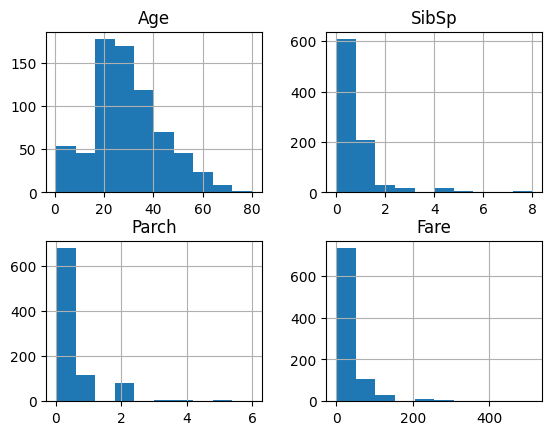

In [9]:
# Display histogram of all numeric variables
df_num.hist()

- Age seems normally distributed, but others aren't.
- We might consider normalizing the ones that are not.

            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


<Axes: >

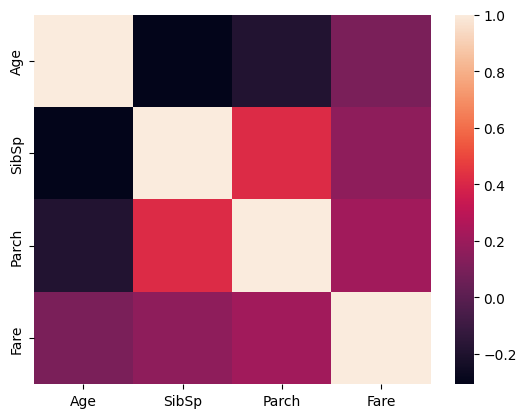

In [10]:
# Correlation Matrix of numeric variables
print(df_num.corr())
sns.heatmap(df_num.corr())

In [11]:
df_train['mfdummy'] = df_train.Sex.apply(lambda x: 0 if x == 'female' else 1)

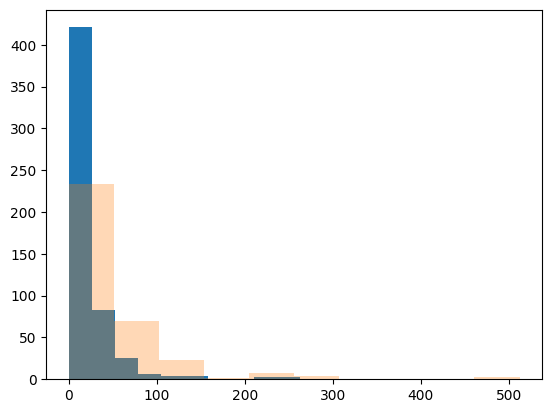

In [12]:
dead = df_train.loc[df_train['Survived']==0]
alive = df_train.loc[df_train['Survived']==1]

fig, ax = plt.subplots(1)

ax.hist(dead['Fare'])
ax.hist(alive['Fare'],alpha=0.3)

plt.show()

In [13]:
# compare survival rate of numerical variables

pd.pivot_table(df_train, index='Survived', values= ['Age', 'SibSp', 'Parch', 'Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


- average age of survivors and such info is not very specific but can get a better idea
- ie) if you are younger or have more parents, you are more likely to survive

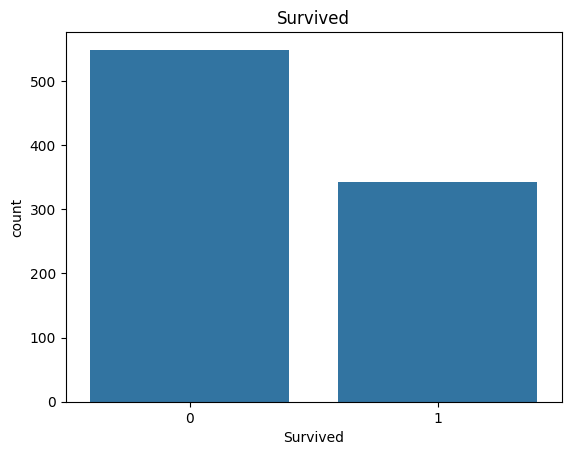

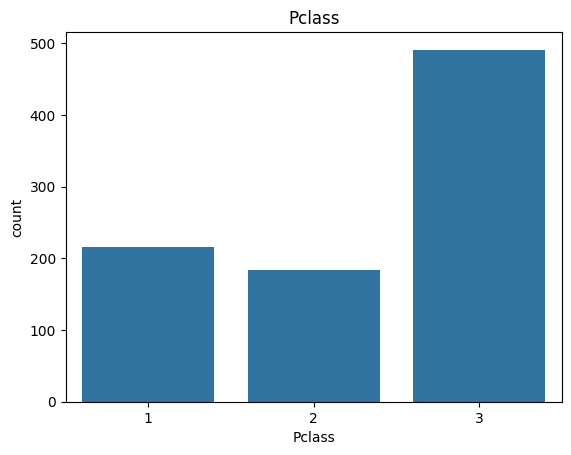

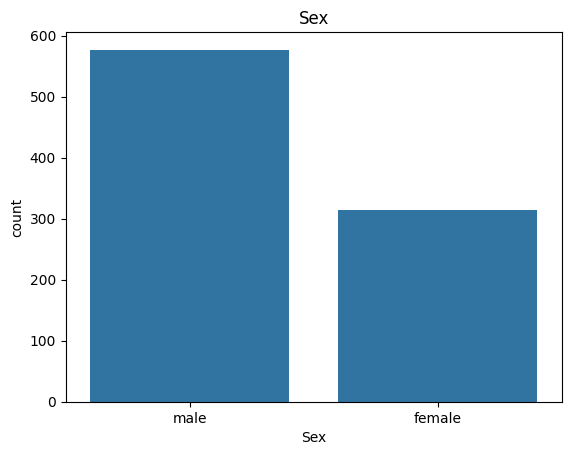

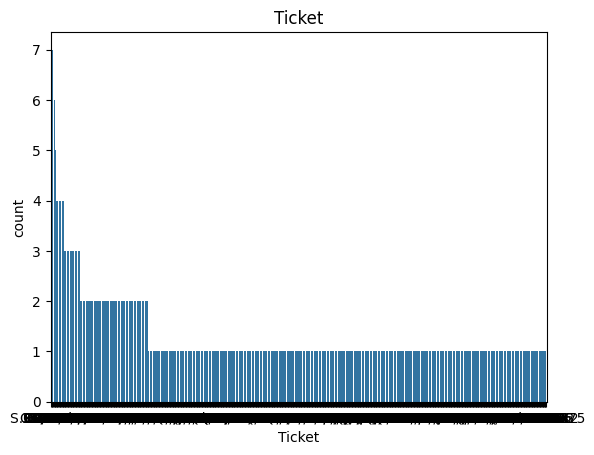

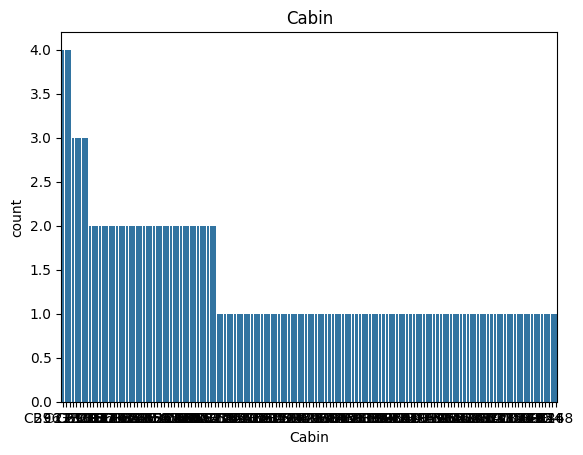

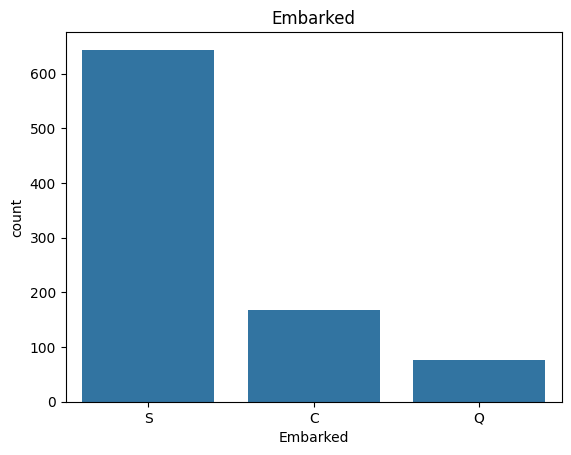

In [14]:
# display barplot for categorical values (ie. Survived, Pclass)
for i in df_cat.columns:
    sns.barplot(df_cat[i].value_counts()).set_title(i)
    plt.show()

In [15]:
# comparing survival and each of these categorical vairables
print(pd.pivot_table(df_train, index='Survived', columns='Pclass', values='PassengerId', aggfunc='count'))
print()
print(pd.pivot_table(df_train, index='Survived', columns='Sex', values='PassengerId', aggfunc='count'))
print()
print(pd.pivot_table(df_train, index='Survived', columns='Embarked', values='PassengerId', aggfunc='count'))


Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

Sex       female  male
Survived              
0             81   468
1            233   109

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


- In the Pclass table, we could see that 1st class has higher chance to survive but is 3rd class, the chance of surviving is very low

In [16]:
# make a new column 'numcab' which represents number of cabins
df_train['numcab'] = df_train.Cabin.apply(lambda x:0 if pd.isna(x) else len(x.split(' ')))
df_train['numcab'].value_counts()

numcab
0    687
1    180
2     16
3      6
4      2
Name: count, dtype: int64

In [17]:
pd.pivot_table(df_train, index='Survived', columns='numcab', values='PassengerId', aggfunc='count')

numcab,0,1,2,3,4
Survived,,,,,
0,481.0,58.0,7.0,3.0,NaN
1,206.0,122.0,9.0,3.0,2.0


- people with no cabin was more likely to be deceased and people with 1 or more cabin has higher chance of survival

In [18]:
# make a new column to see the letter the cabin starts with
df_train['letcab'] = df_train.Cabin.apply(lambda x: str(x)[0])
print(df_train.letcab.value_counts())
pd.pivot_table(df_train, index='Survived', columns='letcab', values='PassengerId', aggfunc='count')

letcab
n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: count, dtype: int64


letcab,A,B,C,D,E,F,G,T,n
Survived,,,,,,,,,
0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0,481.0
1,7.0,35.0,35.0,25.0,24.0,8.0,2.0,NaN,206.0


In [19]:
# trying to understand ticket values
df_train['numtic'] = df_train.Ticket.apply(lambda x:1 if x.isnumeric() else 0)
df_train['lettic'] = df_train.Ticket.apply(lambda x:x.split(' ')[:-1] if len(x.split(' ')[:-1])>0 else 0)

In [20]:
df_train['numtic'].value_counts()

numtic
1    661
0    230
Name: count, dtype: int64

In [21]:
df_train['lettic'].value_counts()

lettic
0                 665
[PC]               60
[C.A.]             27
[STON/O, 2.]       12
[A/5]              10
[W./C.]             9
[CA.]               8
[SOTON/O.Q.]        8
[A/5.]              7
[SOTON/OQ]          7
[STON/O2.]          6
[CA]                6
[F.C.C.]            5
[C]                 5
[SC/PARIS]          5
[S.O.C.]            5
[SC/Paris]          4
[A/4.]              3
[S.O./P.P.]         3
[PP]                3
[A/4]               3
[A.5.]              2
[S.C./PARIS]        2
[SOTON/O2]          2
[P/PP]              2
[SC/AH]             2
[WE/P]              2
[A./5.]             2
[SC/AH, Basle]      1
[SO/C]              1
[S.W./PP]           1
[F.C.]              1
[A/S]               1
[SW/PP]             1
[SC]                1
[SCO/W]             1
[W/C]               1
[Fa]                1
[S.O.P.]            1
[S.C./A.4.]         1
[A4.]               1
[S.P.]              1
[W.E.P.]            1
[C.A./SOTON]        1
Name: count, dtype: int64

In [23]:
# create all categorical variables that we did above for both training and test sets
df_test['numtic'] = df_test.Ticket.apply(lambda x:1 if x.isnumeric() else 0)
df_test['lettic'] = df_test.Ticket.apply(lambda x:x.split(' ')[:-1] if len(x.split(' ')[:-1])>0 else 0)
df_test['numcab'] = df_test.Cabin.apply(lambda x:0 if pd.isna(x) else len(x.split(' ')))
df_test['letcab'] = df_test.Cabin.apply(lambda x: str(x)[0])
df_test['mfdummy'] = df_test.Sex.apply(lambda x: 0 if x == 'female' else 1)

In [26]:
# impute nulls for continuous data
df_train.Age = df_train.Age.fillna(df_train.Age.mean())
df_test.Age = df_test.Age.fillna(df_train.Age.mean())
df_train.Fare = df_train.Fare.fillna(df_train.Fare.mean())
df_test.Fare = df_test.Fare.fillna(df_train.Fare.mean())

# drop null 'embarked' rows.
df_train.dropna(subset=['Embarked'], inplace=True)
df_test.dropna(subset=['Embarked'], inplace=True)

In [30]:
# log norm of fare
df_train['Fare_norm'] = np.log(df_train.Fare+1)
df_test['Fare_norm'] = np.log(df_test.Fare+1)

In [31]:
# convert Pclass to category for pd.get_dummies()
df_train.Pclass = df_train.Pclass.astype(str)

In [45]:
# create dummy variables from categories
x_train = pd.get_dummies(df_train[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare_norm', 'Embarked', 'letcab', 'numcab', 'numtic']])
x_test = pd.get_dummies(df_test[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare_norm', 'Embarked', 'letcab', 'numcab', 'numtic']])
x_train.head()

,Age,SibSp,Parch,Fare_norm,numcab,numtic,Pclass_1,Pclass_2,Pclass_3,Sex_female,...,Embarked_S,letcab_A,letcab_B,letcab_C,letcab_D,letcab_E,letcab_F,letcab_G,letcab_T,letcab_n
0,22.0,1,0,2.110213,0,0,False,False,True,False,...,True,False,False,False,False,False,False,False,False,True
1,38.0,1,0,4.280593,1,0,True,False,False,True,...,False,False,False,True,False,False,False,False,False,False
2,26.0,0,0,2.188856,0,0,False,False,True,True,...,True,False,False,False,False,False,False,False,False,True
3,35.0,1,0,3.990834,1,1,True,False,False,True,...,True,False,False,True,False,False,False,False,False,False
4,35.0,0,0,2.202765,0,1,False,False,True,False,...,True,False,False,False,False,False,False,False,False,True


In [36]:
y_train = df_train.Survived
y_train.shape

(889,)

In [41]:
!pip install scikit-learn

                                              0.0/9.2 MB ? eta -:--:--
     ----------------                         3.8/9.2 MB 79.7 MB/s eta 0:00:01
     ---------------------------------------  9.2/9.2 MB 98.9 MB/s eta 0:00:01
     ---------------------------------------- 9.2/9.2 MB 65.7 MB/s eta 0:00:00
                                              0.0/44.1 MB ? eta -:--:--
     ----                                    5.2/44.1 MB 165.8 MB/s eta 0:00:01
     ---------                              10.5/44.1 MB 131.2 MB/s eta 0:00:01
     -----------                            13.6/44.1 MB 108.8 MB/s eta 0:00:01
     ----------------                        18.9/44.1 MB 93.0 MB/s eta 0:00:01
     ------------------                      21.2/44.1 MB 93.0 MB/s eta 0:00:01
     --------------------                    23.1/44.1 MB 93.9 MB/s eta 0:00:01
     --------------------                    23.1/44.1 MB 93.9 MB/s eta 0:00:01
     --------------------                    23.1/44.1 MB 93


[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [42]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [46]:
# decision tree
dt = tree.DecisionTreeClassifier(random_state=1)
cv = cross_val_score(dt, x_train, y_train, cv=5) 
print(cv)
print(cv.mean())

[0.73033708 0.76966292 0.83146067 0.74157303 0.84180791]
0.7829683234939376


In [47]:
# K Nearest Neighbor
knn = KNeighborsClassifier()
cv = cross_val_score(knn, x_train, y_train, cv=5)
print(cv)
print(cv.mean())

[0.78089888 0.79213483 0.74719101 0.79775281 0.83050847]
0.7896972005332318


In [48]:
# Support Vector Machine
svc = SVC(probability=True)
cv = cross_val_score(svc, x_train, y_train, cv=5)
print(cv)
print(cv.mean())

[0.6741573  0.73595506 0.68539326 0.70786517 0.71186441]
0.7030470386593028


In [49]:
# voting classifier
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators = [('dt', dt), ('knn', knn), ('svc', svc)], voting='soft')

In [50]:
cv = cross_val_score(voting_clf, x_train, y_train, cv=5)
print(cv)
print(cv.mean())

[0.76404494 0.78089888 0.86516854 0.78651685 0.85875706]
0.8110772551260078
